#### Lesson: Growth in Dynamic Linear Economies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ, DLE

In [2]:
# Parameter Matrices
γ_1 = 0.1
ϕ_1 = 1e-5

ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k = (np.array([[1], [0]]),
                              np.array([[0], [1]]),
                              np.array([[1], [-ϕ_1]]),
                              np.array([[γ_1], [0]]),
                              np.array([[.95]]),
                              np.array([[1]]))

β, l_λ, π_h, δ_h, θ_h = (np.array([[1 / 1.05]]),
                         np.array([[0]]),
                         np.array([[1]]),
                         np.array([[.9]]),
                         np.array([[1]]) - np.array([[.9]]))

a22, c2, ub, ud = (np.array([[1,   0,   0],
                             [0, 0.8,   0],
                             [0,   0, 0.5]]),
                   np.array([[0, 0],
                             [1, 0],
                             [0, 1]]),
                   np.array([[30, 0, 0]]),
                   np.array([[5, 1, 0],
                             [0, 0, 0]]))

# Initial condition
x0 = np.array([[5], [150], [1], [0], [0]])

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

In [3]:
econ1 = DLE(info1, tech1, pref1)

In [4]:
econ1.compute_sequence(x0, ts_length=300)

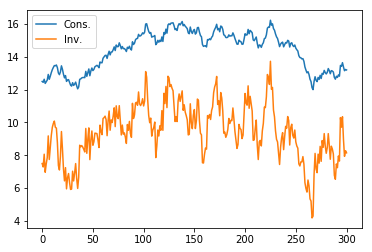

In [5]:
# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c[0], label='Cons.')
plt.plot(econ1.i[0], label='Inv.')
plt.legend()
plt.show()

In [6]:
econ1.endo, econ1.exo

(array([0.9, 1. ]), array([1. , 0.8, 0.5]))

In [7]:
econ1.endo[1]

0.9999999999904767

In [8]:
econ1.compute_steadystate()
np.set_printoptions(precision=3, suppress=True)
print(econ1.css, econ1.iss, econ1.kss)

[[4.999]] [[-0.001]] [[-0.022]]


In [9]:
γ2 = 0.15
γ22 = np.array([[γ2], [0]])

ϕ_12 = 1
ϕ_i2 = np.array([[1], [-ϕ_12]])

tech2 = (ϕ_c, ϕ_g, ϕ_i2, γ22, δ_k, θ_k)

x02 = np.array([[5], [20], [1], [0], [0]])

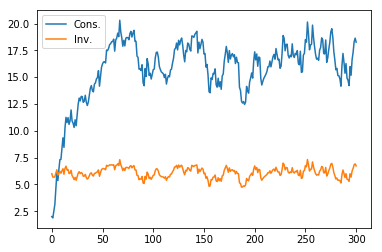

In [10]:
econ2 = DLE(info1, tech2, pref1)

econ2.compute_sequence(x02, ts_length=300)

plt.plot(econ2.c[0], label='Cons.')
plt.plot(econ2.i[0], label='Inv.')
plt.legend()
plt.show()

In [11]:
econ2.compute_steadystate()
print(econ2.css, econ2.iss, econ2.kss)

[[17.5]] [[6.25]] [[125.]]


In [12]:
econ2.endo, econ2.exo

(array([0.9  , 0.952]), array([1. , 0.8, 0.5]))

In [13]:
l_λ2 = np.array([[-1]])
pref2 = (β, l_λ2, π_h, δ_h, θ_h)

In [14]:
econ3 = DLE(info1, tech1, pref2)

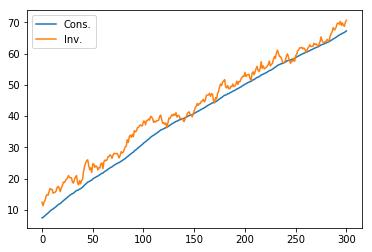

In [15]:
econ3.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.10.1 from p.110 of HS2013
plt.plot(econ3.c[0], label='Cons.')
plt.plot(econ3.i[0], label='Inv.')
plt.legend()
plt.show()

In [16]:
econ3.endo, econ3.exo

(array([1.+0.j, 1.-0.j]), array([1. , 0.8, 0.5]))

In [17]:
econ3.endo, econ3.exo

(array([1.+0.j, 1.-0.j]), array([1. , 0.8, 0.5]))

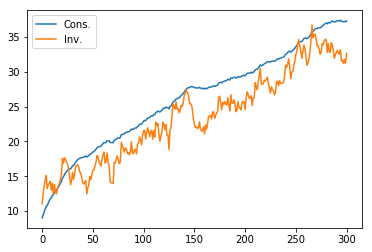

In [18]:
l_λ3 = np.array([[-0.7]])
pref3 = (β, l_λ3, π_h, δ_h, θ_h)

econ4 = DLE(info1, tech1, pref3)

econ4.compute_sequence(x0, ts_length=300)

plt.plot(econ4.c[0], label='Cons.')
plt.plot(econ4.i[0], label='Inv.')
plt.legend()
plt.show()

In [19]:
econ4.endo, econ4.exo

(array([0.97, 1.  ]), array([1. , 0.8, 0.5]))

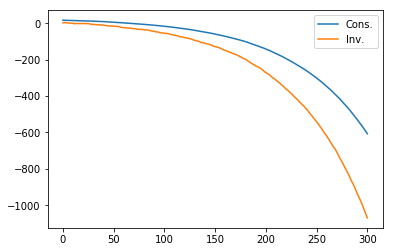

In [20]:
β_2 = np.array([[0.94]])
pref4 = (β_2, l_λ, π_h, δ_h, θ_h)

econ5 = DLE(info1, tech1, pref4)

econ5.compute_sequence(x0, ts_length=300)

plt.plot(econ5.c[0], label='Cons.')
plt.plot(econ5.i[0], label='Inv.')
plt.legend()
plt.show()

In [21]:
econ5.endo, econ5.exo

(array([0.9  , 1.013]), array([1. , 0.8, 0.5]))

#### Lesson: Lucas Asset Pricing Using DLE

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from quantecon import DLE
%matplotlib inline

In [2]:
gam = 0
γ = np.array([[gam], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-4
ϕ_i = np.array([[0], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
a22 = np.array([[1,   0,    0],
                [0, 0.8,    0],
                [0,   0, 0.5]])
c2 = np.array([[0, 1, 0],
               [0, 0, 1]]).T
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]]) - δ_h
ub = np.array([[30, 0, 0]])
x0 = np.array([[5, 150, 1, 0, 0]]).T

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

econ1 = DLE(info1, tech1, pref1)



In [3]:
econ1.compute_sequence(x0, ts_length=100, Pay=np.array([econ1.Sd[0, :]]))

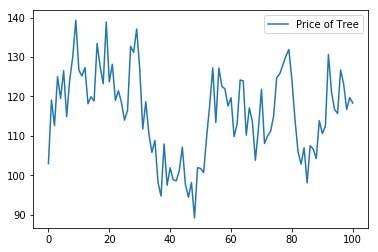

In [4]:
### Fig 7.12.1 from p.147 of HS2013
plt.plot(econ1.Pay_Price, label='Price of Tree')
plt.legend()
plt.show()

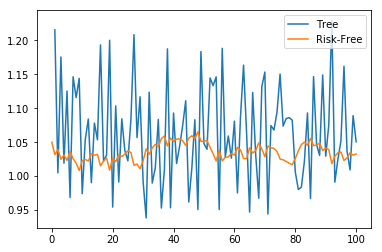

In [5]:
### Left panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(econ1.Pay_Gross, label='Tree')
plt.plot(econ1.R1_Gross, label='Risk-Free')
plt.legend()
plt.show()

In [6]:
np.corrcoef(econ1.Pay_Gross[1:, 0], econ1.R1_Gross[1:, 0])

array([[ 1.        , -0.44813448],
       [-0.44813448,  1.        ]])

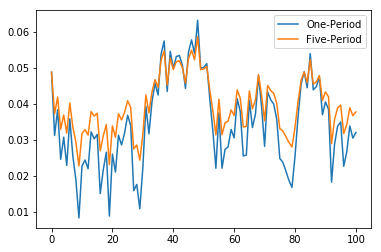

In [7]:
### Right panel of Fig 7.12.2 from p.148 of HS2013
plt.plot(econ1.R1_Net, label='One-Period')
plt.plot(econ1.R5_Net, label='Five-Period')
plt.legend()
plt.show()

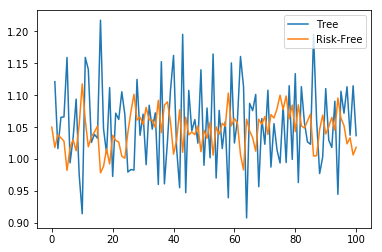

In [8]:
a22_2 = np.array([[1,   0,   0],
                  [0, 0.4,   0],
                  [0,   0, 0.5]])
info2 = (a22_2, c2, ub, ud)

econ2 = DLE(info2, tech1, pref1)
econ2.compute_sequence(x0, ts_length=100, Pay=np.array([econ2.Sd[0, :]]))

### Left panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(econ2.Pay_Gross, label='Tree')
plt.plot(econ2.R1_Gross, label='Risk-Free')
plt.legend()
plt.show()



In [9]:
np.corrcoef(econ2.Pay_Gross[1:, 0], econ2.R1_Gross[1:, 0])

array([[ 1.        , -0.64630458],
       [-0.64630458,  1.        ]])

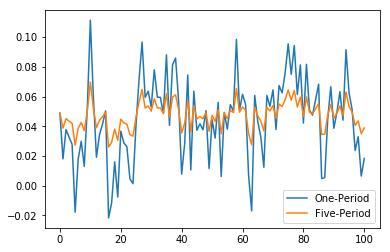

In [10]:
### Right panel of Fig 7.12.3 from p.148 of HS2013
plt.plot(econ2.R1_Net, label='One-Period')
plt.plot(econ2.R5_Net, label='Five-Period')
plt.legend()
plt.show()

#### Lesson: IRFs in Hall Models

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LQ
from quantecon import DLE

In [12]:
γ_1 = 0.1
γ = np.array([[γ_1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-5
ϕ_i = np.array([[1], [-ϕ_1]])
δ_k = np.array([[.95]])
θ_k = np.array([[1]])
β = np.array([[1 / 1.05]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[.9]])
θ_h = np.array([[1]])
a22 = np.array([[1,   0,   0],
                [0, 0.8,   0],
                [0,   0, 0.5]])
c2 = np.array([[0, 0],
               [1, 0],
               [0, 1]])
ud = np.array([[5, 1, 0],
               [0, 0, 0]])
ub = np.array([[30, 0, 0]])
x0 = np.array([[5], [150], [1], [0], [0]])

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)

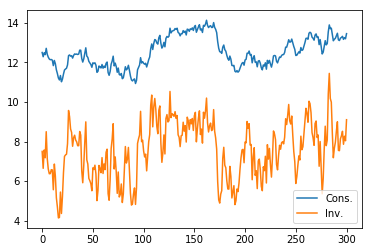

In [13]:
econ1 = DLE(info1, tech1, pref1)
econ1.compute_sequence(x0, ts_length=300)

# This is the right panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c[0], label='Cons.')
plt.plot(econ1.i[0], label='Inv.')
plt.legend()
plt.show()

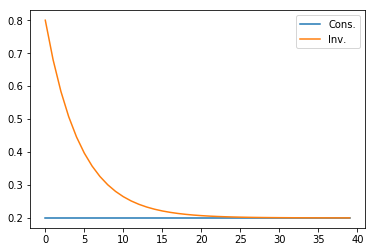

In [14]:
econ1.irf(ts_length=40, shock=None)
# This is the left panel of Fig 5.7.1 from p.105 of HS2013
plt.plot(econ1.c_irf, label='Cons.')
plt.plot(econ1.i_irf, label='Inv.')
plt.legend()
plt.show()

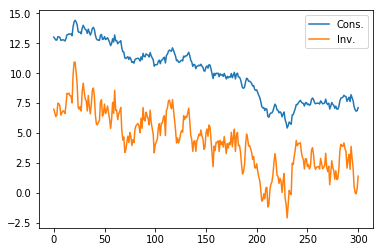

In [15]:
ϕ_12 = 0.2
ϕ_i2 = np.array([[1], [-ϕ_12]])
tech2 = (ϕ_c, ϕ_g, ϕ_i2, γ, δ_k, θ_k)

econ2 = DLE(info1, tech2, pref1)
econ2.compute_sequence(x0, ts_length = 300)

# This is the right panel of Fig 5.8.1 from p.106 of HS2013
plt.plot(econ2.c[0], label='Cons.')
plt.plot(econ2.i[0], label='Inv.')
plt.legend()
plt.show()

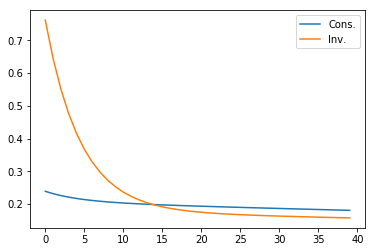

In [16]:
econ2.irf(ts_length=40,shock=None)
# This is the left panel of Fig 5.8.1 from p.106 of HS2013
plt.plot(econ2.c_irf,label='Cons.')
plt.plot(econ2.i_irf,label='Inv.')
plt.legend()
plt.show()

In [17]:
econ2.endo

array([0.9       , 0.99657126])

In [18]:
econ2.compute_steadystate()
print(econ2.css, econ2.iss, econ2.kss)

[[5.]] [[2.02678791e-12]] [[4.05357139e-11]]


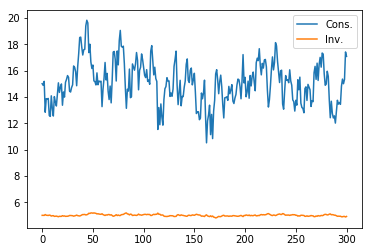

In [19]:
ϕ_13 = 1
ϕ_i3 = np.array([[1], [-ϕ_13]])

γ_12 = 0.15
γ_2 = np.array([[γ_12], [0]])

l_λ2 = np.array([[0.1]])
π_h2 = np.array([[0]])

x01 = np.array([[150], [100], [1], [0], [0]])

tech3 = (ϕ_c, ϕ_g, ϕ_i3, γ_2, δ_k, θ_k)
pref2 = (β, l_λ2, π_h2, δ_h, θ_h)

econ3 = DLE(info1, tech3, pref2)
econ3.compute_sequence(x01, ts_length=300)

# This is the right panel of Fig 5.11.1 from p.111 of HS2013
plt.plot(econ3.c[0], label='Cons.')
plt.plot(econ3.i[0], label='Inv.')
plt.legend()
plt.show()



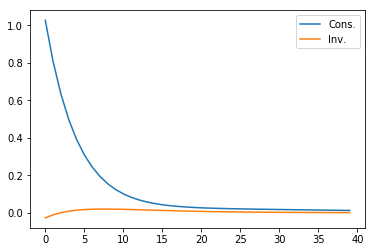

In [20]:
econ3.irf(ts_length=40, shock=None)
# This is the left panel of Fig 5.11.1 from p.111 of HS2013
plt.plot(econ3.c_irf, label='Cons.')
plt.plot(econ3.i_irf, label='Inv.')
plt.legend()
plt.show()

#### Lesson: Permanent Income Model using the DLE Class

In [21]:
import quantecon as qe
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import DLE

np.set_printoptions(suppress=True, precision=4)

In [22]:
α, β, ρ_1, ρ_2, σ = 10, 0.95, 0.9, 0, 1

γ = np.array([[-1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-5
ϕ_i = np.array([[-1], [-ϕ_1]])
δ_k = np.array([[0]])
θ_k = np.array([[1 / β]])
β = np.array([[β]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[0]])
θ_h = np.array([[0]])

a22 = np.array([[1,   0,   0],
                [α, ρ_1, ρ_2],
                [0, 1, 0]])

c2 = np.array([[0], [σ], [0]])
ud = np.array([[0, 1, 0],
               [0, 0, 0]])
ub = np.array([[100, 0, 0]])

x0 = np.array([[0], [0], [1], [0], [0]])

info1 = (a22, c2, ub, ud)
tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = (β, l_λ, π_h, δ_h, θ_h)
econ1 = DLE(info1, tech1, pref1)

In [23]:
econ1.Sc

array([[ 0.    , -0.05  , 65.5172,  0.3448,  0.    ]])

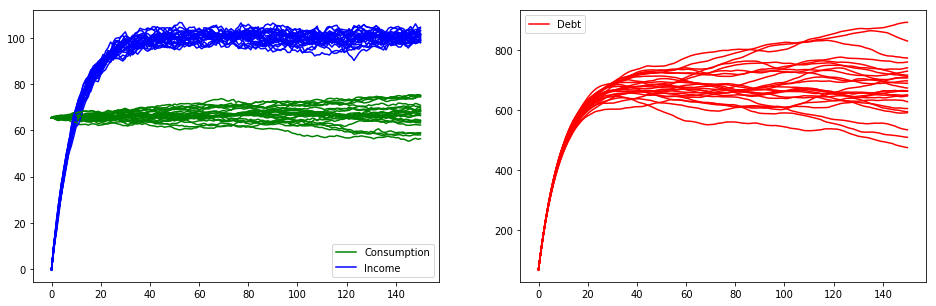

In [24]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

for i in range(25):
    econ1.compute_sequence(x0, ts_length=150)
    ax1.plot(econ1.c[0], c='g')
    ax1.plot(econ1.d[0], c='b')
ax1.plot(econ1.c[0], label='Consumption', c='g')
ax1.plot(econ1.d[0], label='Income', c='b')
ax1.legend()

for i in range(25):
    econ1.compute_sequence(x0, ts_length=150)
    ax2.plot(econ1.k[0], color='r')
ax2.plot(econ1.k[0], label='Debt', c='r')
ax2.legend()
plt.show()

#### Lesson: Rosen Schooling Model

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from collections import namedtuple
from quantecon import DLE
from math import sqrt
%matplotlib inline

In [26]:
Information = namedtuple('Information', ['a22', 'c2','ub','ud'])
Technology = namedtuple('Technology', ['ϕ_c', 'ϕ_g', 'ϕ_i', 'γ', 'δ_k', 'θ_k'])
Preferences = namedtuple('Preferences', ['β', 'l_λ', 'π_h', 'δ_h', 'θ_h'])

In [27]:
k = 4  # Number of periods of schooling required to become an engineer

β = np.array([[1 / 1.05]])
α_d = np.array([[0.1]])
α_s = 1
ε_1 = 1e-7
λ_1 = np.ones((1, k)) * ε_1
# Use of ε_1 is trick to aquire detectability, see HS2013 p. 228 footnote 4
l_λ = np.hstack((α_d, λ_1))
π_h = np.array([[0]])

δ_n = np.array([[0.95]])
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k + 1))))

θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

ψ_1 = 1 / α_s

ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [-1]])
ϕ_i = np.array([[-1], [ψ_1]])
γ = np.array([[0], [0]])

δ_k = np.array([[0]])
θ_k = np.array([[0]])

ρ_s = 0.8
ρ_d = 0.8

a22 = np.array([[1,   0,   0],
                [0, ρ_s,   0],
                [0,   0, ρ_d]])

c2 = np.array([[0, 0], [10, 0], [0, 10]])
ub = np.array([[30, 0, 1]])
ud = np.array([[10, 1, 0], [0, 0, 0]])

info1 = Information(a22, c2, ub, ud)
tech1 = Technology(ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
pref1 = Preferences(β, l_λ, π_h, δ_h, θ_h)

econ1 = DLE(info1, tech1, pref1)

In [28]:
α_d = np.array([[2]])
l_λ = np.hstack((α_d, λ_1))
pref2 = Preferences(β, l_λ, π_h, δ_h, θ_h)
econ2 = DLE(info1, tech1, pref2)

α_d = np.array([[0.1]])

k = 7
λ_1 = np.ones((1, k)) * ε_1
l_λ = np.hstack((α_d, λ_1))
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k+1))))
θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

Pref3 = Preferences(β, l_λ, π_h, δ_h, θ_h)
econ3 = DLE(info1, tech1, Pref3)

k = 10
λ_1 = np.ones((1, k)) * ε_1
l_λ = np.hstack((α_d, λ_1))
d1 = np.vstack((δ_n, np.zeros((k - 1, 1))))
d2 = np.hstack((d1, np.eye(k)))
δ_h = np.vstack((d2, np.zeros((1, k + 1))))
θ_h = np.vstack((np.zeros((k, 1)),
                 np.ones((1, 1))))

pref4 = Preferences(β, l_λ, π_h, δ_h, θ_h)
econ4 = DLE(info1, tech1, pref4)

shock_demand = np.array([[0], [1]])

econ1.irf(ts_length=25, shock=shock_demand)
econ2.irf(ts_length=25, shock=shock_demand)
econ3.irf(ts_length=25, shock=shock_demand)
econ4.irf(ts_length=25, shock=shock_demand)

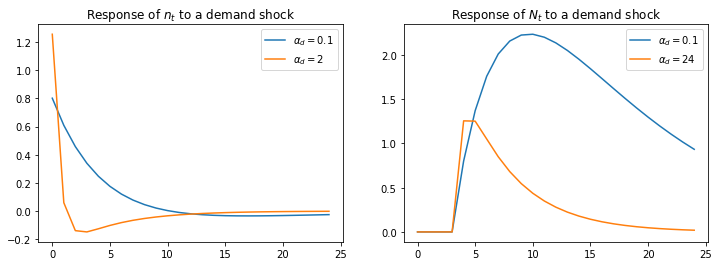

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(econ1.c_irf,label='$\\alpha_d = 0.1$')
ax1.plot(econ2.c_irf,label='$\\alpha_d = 2$')
ax1.legend()
ax1.set_title('Response of $n_t$ to a demand shock')

ax2.plot(econ1.h_irf[:, 0], label='$\\alpha_d = 0.1$')
ax2.plot(econ2.h_irf[:, 0], label='$\\alpha_d = 24$')
ax2.legend()
ax2.set_title('Response of $N_t$ to a demand shock')
plt.show()

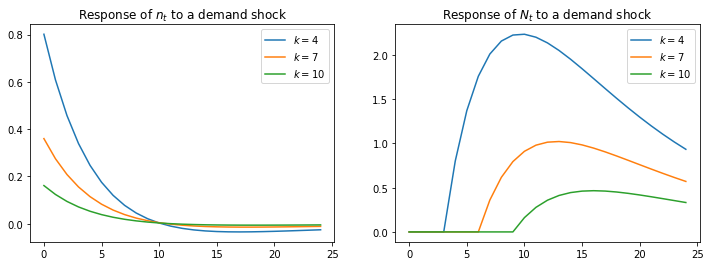

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(econ1.c_irf, label='$k=4$')
ax1.plot(econ3.c_irf, label='$k=7$')
ax1.plot(econ4.c_irf, label='$k=10$')
ax1.legend()
ax1.set_title('Response of $n_t$ to a demand shock')

ax2.plot(econ1.h_irf[:,0], label='$k=4$')
ax2.plot(econ3.h_irf[:,0], label='$k=7$')
ax2.plot(econ4.h_irf[:,0], label='$k=10$')
ax2.legend()
ax2.set_title('Response of $N_t$ to a demand shock')
plt.show()

#### Lesson: Cattle Cycles

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from quantecon import LQ
from collections import namedtuple
from quantecon import DLE
from math import sqrt
%matplotlib inline

In [32]:
# We define namedtuples in this way as it allows us to check, for example,
# what matrices are associated with a particular technology.

Information = namedtuple('Information', ['a22', 'c2', 'ub', 'ud'])
Technology = namedtuple('Technology', ['ϕ_c', 'ϕ_g', 'ϕ_i', 'γ', 'δ_k', 'θ_k'])
Preferences = namedtuple('Preferences', ['β', 'l_λ', 'π_h', 'δ_h', 'θ_h'])

In [33]:
β = np.array([[0.909]])
lλ = np.array([[0]])

a1 = 0.5
πh = np.array([[1 / (sqrt(a1))]])
δh = np.array([[0]])
θh = np.array([[0]])

δ = 0.1
g = 0.85
f1 = 0.001
f3 = 0.001
f5 = 0.001
f7 = 0.001

ϕc = np.array([[1], [f1], [0], [0], [-f7]])

ϕg = np.array([[0, 0, 0, 0],
               [1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1,0],
               [0, 0, 0, 1]])

ϕi = np.array([[1], [0], [0], [0], [0]])

γ = np.array([[           0,  0,      0],
              [f1 * (1 - δ),  0, g * f1],
              [          f3,  0,      0],
              [           0, f5,      0],
              [           0,  0,      0]])

δk = np.array([[1 - δ, 0, g],
               [    1, 0, 0],
               [    0, 1, 0]])

θk = np.array([[1], [0], [0]])

ρ1 = 0
ρ2 = 0
ρ3 = 0.6
a0 = 500
γ0 = 0.4
γ1 = 0.7
f2 = 1 / (2 * f1)
f4 = γ0 * g / (2 * f3)
f6 = γ1 * g / (2 * f5)
f8 = 1 / (2 * f7)

a22 = np.array([[1, 0, 0, 0],
                [0, ρ1, 0, 0],
                [0, 0, ρ2, 0],
                [0, 0, 0, ρ3]])

c2 = np.array([[0, 0,  0],
               [1, 0,  0],
               [0, 1,  0],
               [0, 0, 15]])

ub = np.array([[πh * a0, 0, 0, πh]])
uh = np.array([[50, 1, 0, 0]])
um = np.array([[100, 0, 1, 0]])
ud = np.vstack(([0, 0, 0, 0],
                f2 * uh, f4 * uh, f6 * uh, f8 * um))

In [34]:
info1 = Information(a22, c2, ub, ud)
tech1 = Technology(ϕc, ϕg, ϕi, γ, δk, θk)
pref1 = Preferences(β, lλ, πh, δh, θh)

ρ3_2 = 1
a22_2 = np.array([[1,  0,  0,    0],
                  [0, ρ1,  0,    0],
                  [0,  0, ρ2,    0],
                  [0,  0,  0, ρ3_2]])

info2 = Information(a22_2, c2, ub, ud)

ρ3_3 = 0
a22_3 = np.array([[1,  0,  0,    0],
                  [0, ρ1,  0,    0],
                  [0,  0, ρ2,    0],
                  [0,  0,  0, ρ3_3]])

info3 = Information(a22_3, c2, ub, ud)

# Example of how we can look at the matrices associated with a given namedtuple
info1.a22

array([[1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.6]])

In [35]:
# Use tuples to define DLE class
econ1 = DLE(info1, tech1, pref1)
econ2 = DLE(info2, tech1, pref1)
econ3 = DLE(info3, tech1, pref1)

# Calculate steady-state in baseline case and use to set the initial condition
econ1.compute_steadystate(nnc=4)
x0 = econ1.zz

econ1.compute_sequence(x0, ts_length=100)



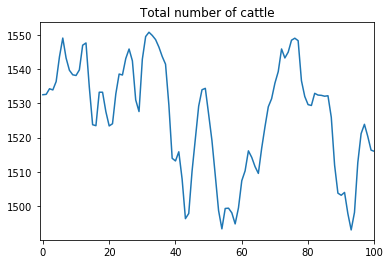

In [36]:
# Calculation of y_t
totalstock = econ1.k[0] + g * econ1.k[1] + g * econ1.k[2]
fig, ax = plt.subplots()
ax.plot(totalstock)
ax.set_xlim((-1, 100))
ax.set_title('Total number of cattle')
plt.show()